In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

In [55]:
from maddux.robots import Link, Arm
from maddux.robots import simple_human_arm
from maddux.robots import utils
import numpy as np
from scipy.optimize import fsolve

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

In [239]:
def find_release_velocity(start, end, time):
    """Find velocity needed to get from start to end in time seconds
    :param start: 1x3 numpy array of start location
    :param end: 1x3 numpy array of end location
    :param time: flight time desired
    """
    v = (end - start) / time
    vx, vy = v[:2]
    
    def find_vz(vz, z0, z, t):
        return ((z - z0) / t + 0.5 * 9.81 * t) - vz
    
    vz = fsolve(find_vz, 0, args=(start[2], end[2], t))[0]
    
    return (vx, vy, vz)

In [285]:
origin = np.array([0, 0, 0])
end = np.array([3, 5, 2.5])
t = 1.0
vx, vy, vz = find_release_velocity(origin, end, t)
print "Velocities: {}".format([vx, vy, vz])



def draw_line(vx, vy, vz, t, ax):
    lamb = np.linspace(0, t, 100)
    
    x = origin[0] + lamb * vx
    y = origin[1] + lamb * vy
    z = origin[2] + lamb * vz - (9.81 / 2) * lamb**2
    
    ax.plot(x, y, z)

Velocities: [3.0, 5.0, 7.4050000000000002]


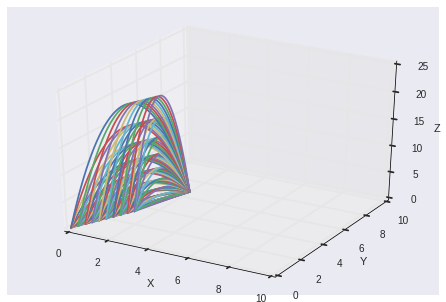

In [311]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_ylim([0, 10])

for t in np.linspace(0.2, 4.0, 10):
    o1 = np.linspace(0, 2, 10)
    o2 = np.linspace(0, 2, 10)
    o3 = np.linspace(0, 2, 10)
    origins = np.vstack((o1, o2, o3)).T
    for origin in origins:
        vx, vy, vz = find_release_velocity(origin, end, t)
        draw_line(vx, vy, vz, t, ax)

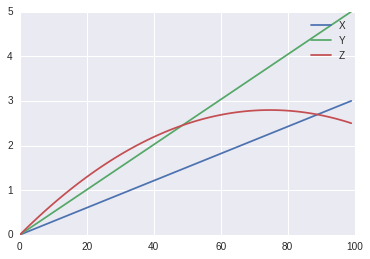

In [281]:
plt.plot(x, label='X')
plt.plot(y, label='Y')
plt.plot(z, label='Z')
plt.legend()